In [1]:
import numpy as np
import pandas as pd

from sktime.forecasting.arch import ARCH
from sktime.utils.plotting import plot_series
# временной горизонт для прогнозирования
from sktime.forecasting.base import ForecastingHorizon
from statsmodels.tsa.api import UnobservedComponents
from statsmodels.tsa.filters.hp_filter import hpfilter
from statsmodels.tsa.seasonal import STL
from sktime.performance_metrics.forecasting import MeanSquaredError, MeanAbsoluteError, MeanAbsolutePercentageError, MeanAbsolutePercentageError #MSE, MAE, MAPE


import pandas_datareader.data as web

# настройки визуализации
import matplotlib.pyplot as plt

# Не показывать Warnings
import warnings
warnings.simplefilter(action='ignore', category=Warning)
# Не показывать ValueWarning, ConvergenceWarning из statsmodels
from statsmodels.tools.sm_exceptions import ValueWarning, ConvergenceWarning
warnings.simplefilter('ignore', category=ValueWarning)
warnings.simplefilter('ignore', category=ConvergenceWarning)

# 1 ЗАДАНИЕ

<Axes: xlabel='DATE'>

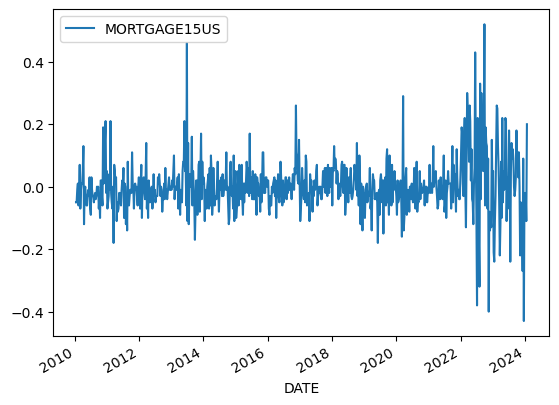

In [8]:
y = web.DataReader(name='MORTGAGE15US', data_source='fred', start='2010-01-01', end='2024-01-31' )
y= y.diff().dropna()
y.plot()

In [9]:
forecaster = ARCH(mean='AR', lags=1, vol='GARCH', p=2, q=2, power=2)  
forecaster.fit(y)

ARCH(lags=1, mean='AR', p=2, power=2, q=2)

In [49]:
# зададим горизонт прогнозирования и частотность
fh = ForecastingHorizon(np.arange(1,10), freq ='W-Fri')

# прогноз по y на основе AR модели
y_pred = forecaster.fit_predict(y=y, fh=fh)
y_pred*1000


,MORTGAGE15US
2024-02-02,6.448170
2024-02-09,-0.398980
2024-02-16,-3.686509
2024-02-23,-3.983168
2024-03-01,-4.049689
2024-03-08,-4.058046
2024-03-15,-4.059531
2024-03-22,-4.059744
2024-03-29,-4.059778


### Ответ: прогноз на один период * 1000 ~ 8,35

In [50]:
# прогноз волатильности
var_predict = forecaster.predict_var(fh=fh)

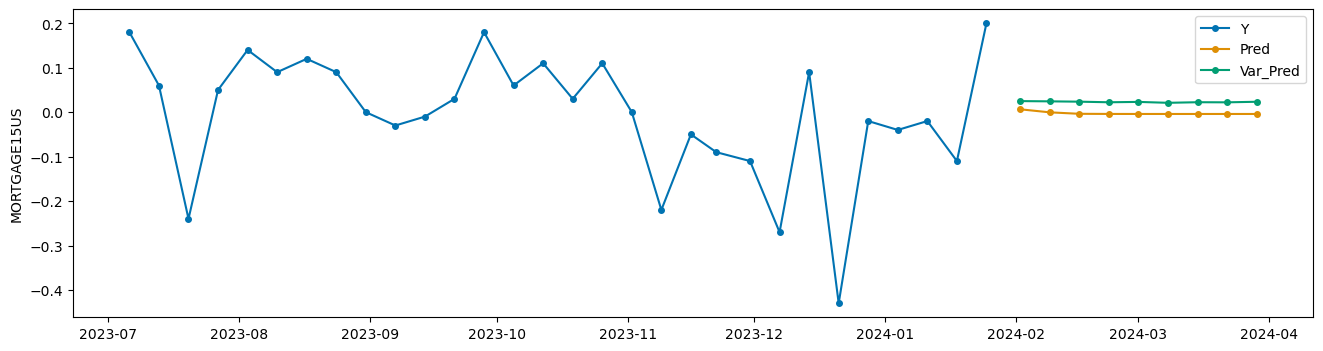

In [51]:
plot_series(y.tail(30), y_pred, var_predict, labels=['Y', 'Pred', 'Var_Pred'])
plt.show()

# 2 ЗАДАНИЕ

<Axes: xlabel='DATE'>

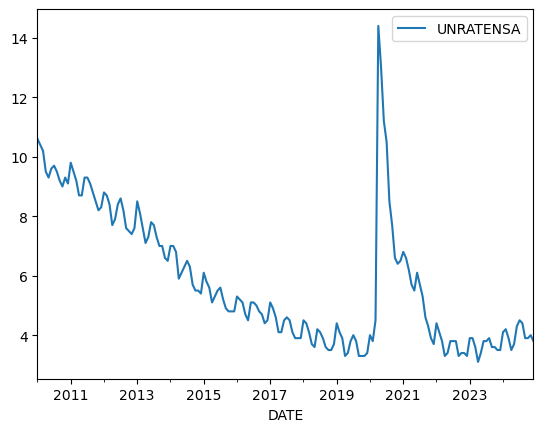

In [27]:
y = web.DataReader(name='UNRATENSA', data_source='fred', start='2010-01-01', end='2024-12-31')
y.plot()

In [33]:
mod = UnobservedComponents(y, level=True, trend=True, seasonal=6, cycle=False, 
                           stochastic_level=True, stochastic_trend=True, stochastic_seasonal=True, stochastic_cycle=True)

res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Unobserved Components Results                            
====================================================================================
Dep. Variable:                    UNRATENSA   No. Observations:                  180
Model:                                 None   Log Likelihood                -225.703
                   + stochastic seasonal(6)   AIC                            457.407
Date:                    jeu., 24 avr. 2025   BIC                            466.866
Time:                              19:58:51   HQIC                           461.244
Sample:                          01-01-2010                                         
                               - 12-01-2024                                         
Covariance Type:                        opg                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
sigma2.level        0.7073      0.033     21.538      0.000       0.643       0.772
sigma2.trend     1.458e-11      0.000   3.84e-08      1.000      -0.001       0.001
sigma2.seasonal  5.797e-11      0.001   8.95e-08      1.000      -0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):             93221.79
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):              33.74   Skew:                             9.48
Prob(H) (two-sided):                  0.00   Kurtosis:                       115.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

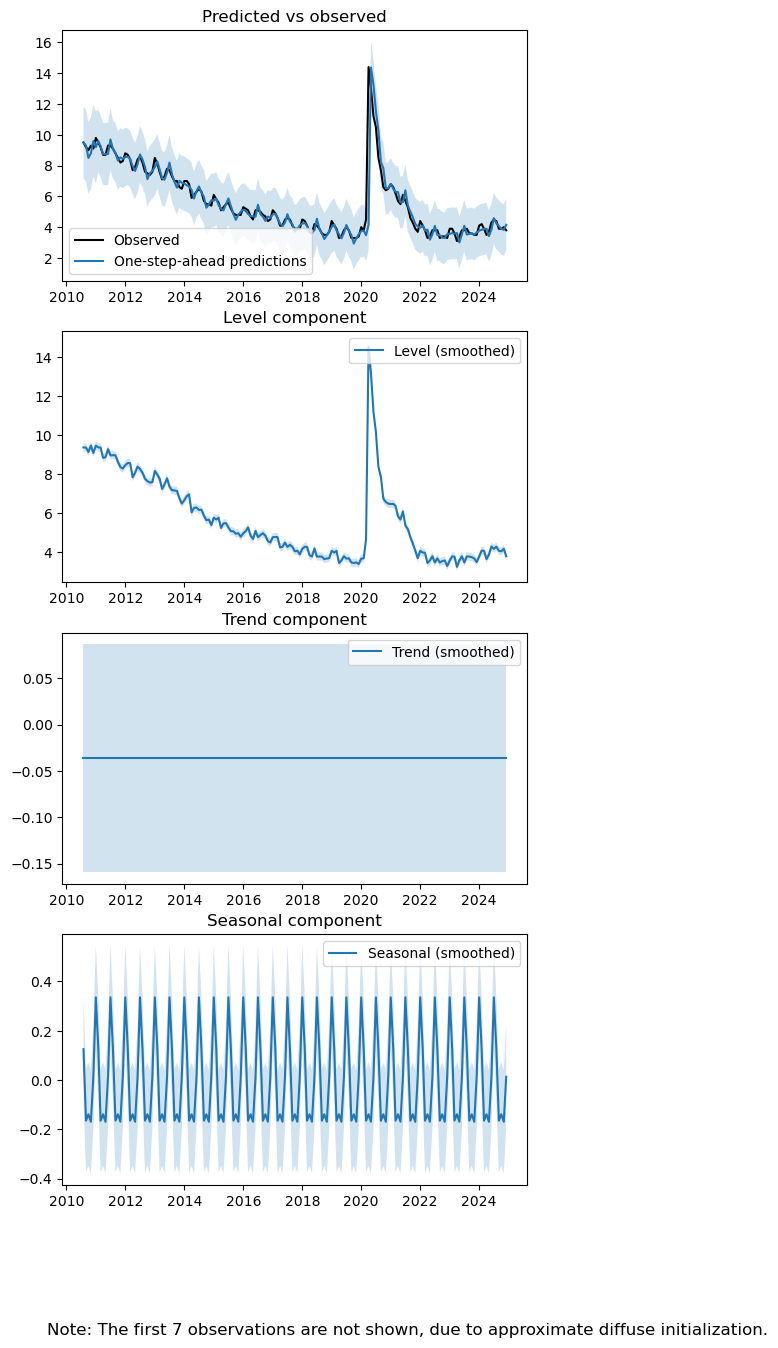

In [34]:
# визуализация компонент
fig = res.plot_components(figsize=(6, 15))

# изменим положение легенды для каждого подграфика
for i in range(y.shape[1]):
    fig.axes[i].legend(loc=3)

plt.show()

In [35]:
res.forecast(steps=5)

2025-01-01    4.086207
2025-02-01    3.839540
2025-03-01    3.512874
2025-04-01    3.502874
2025-05-01    3.436207
Freq: MS, Name: predicted_mean, dtype: float64

### Ответ: прогноз на 2 периода вперед = 3,84

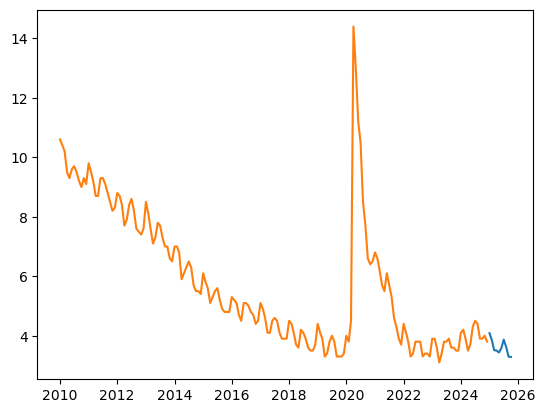

In [31]:
# Визуализация прогноза
plt.plot(res.forecast(steps=10))
plt.plot(y)
plt.show()

# 3 ЗАДАНИЕ

<Axes: xlabel='DATE'>

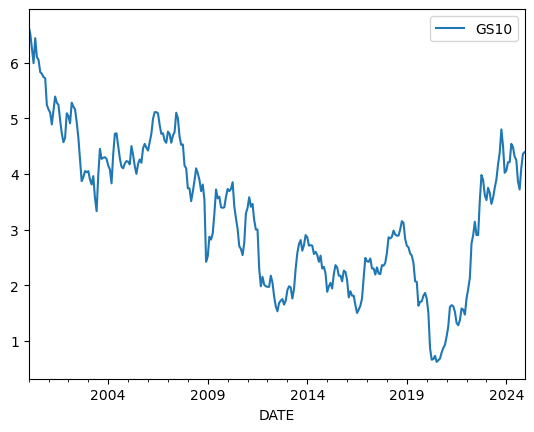

In [37]:
y = web.DataReader(name='GS10', data_source='fred', start='2000-01-01', end='2024-12-31')
y.plot()

### Так как данные месячные, следует использовать коэффициент $\lambda = 14400$

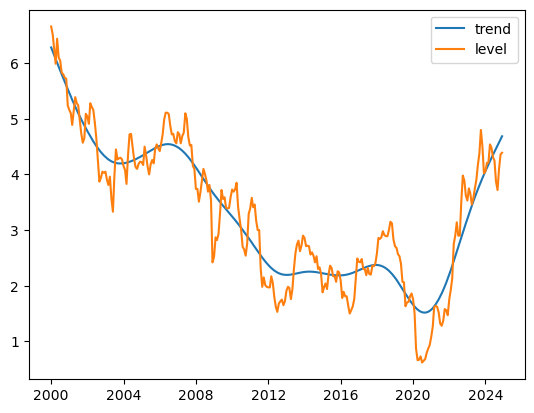

In [41]:
cycle, trend = hpfilter(y, lamb=14400)

#визуализация тренда на оригинальном наборе данных
plt.plot(trend, label='trend')
plt.plot(y, label='level')
plt.legend()
plt.show()


In [42]:
trend.tail()

DATE
2024-08-01    4.465387
2024-09-01    4.520699
2024-10-01    4.575879
2024-11-01    4.630998
2024-12-01    4.686097
Name: trend, dtype: float64

### Ответ: значение тренда в последней точке = 4,69

# 4 ЗАДАНИЕ

### AR(2)-GARCH(p=1,q=1), $\lambda = 2$

 $y_t = \alpha_0 + \phi_1 y_{t-1} + \phi_2 y_{t-2} + u_t$

$u_t = \sigma_t \epsilon_t$

$\sigma_t^2 = w + \alpha_1 |\epsilon_{t-1}|^2 + \beta_1 \sigma_{t-1}^2$

# 5 ЗАДАНИЕ

<Axes: xlabel='DATE'>

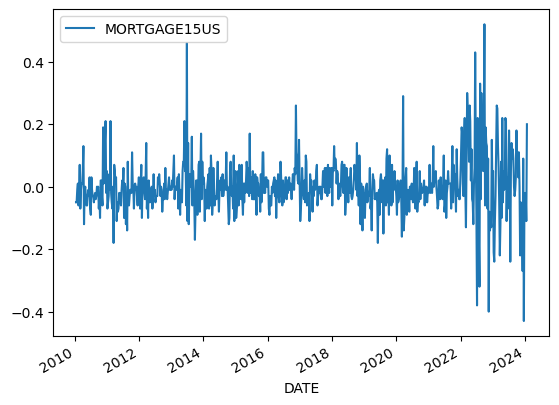

In [48]:
y = web.DataReader(name='MORTGAGE15US', data_source='fred', start='2010-01-01', end='2024-01-31')
y = y.diff().dropna()
y.plot()

In [46]:
forecaster = ARCH(mean='AR', lags=2, vol='GARCH', p=1, q=1, power=2)  
forecaster.fit(y)

forecaster.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           AR - GARCH Model Results                           
==============================================================================
Dep. Variable:                   None   R-squared:                       0.011
Mean Model:                        AR   Adj. R-squared:                  0.008
Vol Model:                      GARCH   Log-Likelihood:                895.532
Distribution:                  Normal   AIC:                          -1779.06
Method:            Maximum Likelihood   BIC:                          -1751.50
                                        No. Observations:                  731
Date:              jeu., avr. 24 2025   Df Residuals:                      728
Time:                        20:33:15   Df Model:                            3
                                  Mean Model                                  
==============================================================================
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
Const      -3.7589e-03  2.580e-03     -1.457      0.145 [-8.816e-03,1.298e-03]
None[1]         0.0592  4.632e-02      1.279      0.201   [-3.156e-02,  0.150]
None[2]         0.0149  4.706e-02      0.316      0.752   [-7.734e-02,  0.107]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      2.2942e-04  1.011e-04      2.270  2.323e-02 [3.130e-05,4.275e-04]
alpha[1]       0.1458  5.311e-02      2.746  6.039e-03   [4.173e-02,  0.250]
beta[1]        0.8285  4.780e-02     17.332  2.695e-67     [  0.735,  0.922]
============================================================================

Covariance estimator: robust
"""

### Ответ:

$\alpha = 0.146$

$\beta = 0.829$

# Большое спасибо за курс! Было очень полезно! Буду стараться применять знания на практике